# Required Installations

In [30]:
# !pip install automata-lib
# !pip install pandas
# !pip install graphviz
# !pip install colormath
# !pip install jupyterlab
# !pip install visual-automata
# !pip install automathon

# Imports

In [31]:
import re                     # Used to validate regex

import json                   # Used to write and load json file

from automathon import NFA    # Used to draw

# Function Definitions

In [32]:
# Utility function
# Character range function
def range_char(start, stop):
    # loops from character start to stop. e.g. range_char('a', 'd')
    # return (chr(n) for n in range(ord(start), ord(stop) + 1))     #  = ['a', 'b', 'c', 'd']         -----> Inclusive
    return (chr(n) for n in range(ord(start) + 1, ord(stop)))       #  = ['b', 'c']               -----> Exclusive

In [33]:
# Validates regex pattern
def Validate_Regex(pattern):
    try:
        re.compile(pattern)
        # print("Valid regex pattern")
    except re.error:
        print("Non valid regex pattern")
        exit()

In [34]:

# Outputs json file from a dictionary
def Json_Output(dict, filename):
    # Serializing json
    json_object = json.dumps(dict, indent=4)
    # print(json_object)
    # Writing to sample.json
    with open(filename, "w") as outfile:
        outfile.write(json_object)

# Loads json file and returns it as a dictionary
def Json_Load(filename):
    # Opening JSON file
    with open(filename, 'r') as openfile:
        # Reading from json file
        json_object = json.load(openfile)           # dictionary
    return json_object

In [35]:
# Utility Function

# Changes format of json file to NFA format
def Change_Format(json_dictionary):
    Q = set()                       # States
    sigma = set()                   # Alphabet
    delta = dict()                  # Transition function
    initialState = ''               # Initial state
    F = set()                       # Final states

    for key1,value1 in json_dictionary.items():     # outer dictionary
        if (key1 == "startingState"):
            initialState = value1       # initial state
            continue
        
        Q.add(key1)                     # add state

        for key2,value2 in value1.items():      # inner dictionary
            if (key2 == "isTerminatingState"):
                if (value2 == True):
                    F.add(key1)         # add final state
                continue
            
            sigma.add(key2)             # input
            # kda m3ana el Q, sigma, F, initial state

            # n3ml el delta b2a
            if (key1 in delta):         
                # check if key1 is in delta as keys, lw kda, yb2a lyha dictionary mwgood
                # fa hadeef 3l dictionary dh el key2, value2
                if (key2 in delta[key1]):
                    if (type(value2) == list):      # if value2 is a list, hadeef kol el elements
                        delta[key1][key2].update(value2)    # add list items to set
                    else:                           # if value2 element wa7ed, hadeefo
                        delta[key1][key2].add(value2)
                
                else:                               # key2 awl mara a7oto, fa hadeef el set
                    if (type(value2) == list):
                        delta[key1].update({key2 : set(value2)})        # ba7ot list el states elly ye2dar yro7laha kolaha
                    else:                           # 3omro ma hy5osh hena 3mtn, bs dh 3lshan lw mkonash 3amleen list
                        delta[key1][key2] = {value2}

            else:                       # key1 awl mara a7oto, fa h3araf el set
                                        # y3ny el state awl mara tezhar
                if (type(value2) == list):
                    delta[key1] = {key2 : set(value2)}
                else:
                    delta[key1] = {key2 : {value2}}
             
    return Q, sigma, delta, initialState, F

In [36]:
# Test cases
########################  Json output  ######################

# json1 = dict()
# json1['startingState'] = "S0"
# json1["S0"] = dict()
# json1["S0"]["isTerminatingState"] = True
# json1["S0"]["0"] = ["S0", "S1"]
# json1["S0"]["1"] = 'S1'
# json1["S1"] = dict()
# json1["S1"]["isTerminatingState"] = False
# json1["S1"]["0"] = 'S2'
# json1["S1"]["1"] = 'S0'
# json1["S2"] = dict()
# json1["S2"]["isTerminatingState"] = True
# json1["S2"]["0"] = 'S1'
# json1["S2"]["1"] = 'S2'
# print(json1)

# Json_Output(json1, "json1.json")

##########################################################################
######################  Visualizing NFA/DFA  #############################

# ## Epsilon Transition is denoted by '' -> Empty string
# Q = {'q1', 'q2', 'q3', 'q4'}            # States
# sigma = {'0', '1'}                      # Alphabet
# delta = {                               # Transition function
#           'q1' : {
#                   '0' : {'q1'},
#                   '1' : {'q1', 'q2'}
#                   },
#           'q2' : {
#                   '0' : {'q3'},
#                   '' : {'q3'}
#                   },
#           'q3' : {
#                   '1' : {'q4'},
#                   },
#           'q4' : {
#                   '0' : {'q4'},
#                   '1' : {'q4'},
#                   },
#         }
# initialState = 'q1'                     # Initial state
# F = {'q4'}                              # Final states

# automata2 = NFA(Q, sigma, delta, initialState, F)
# automata2.view("NFA Visualization")

#################################################################
###################  Loading Json  ##############################
# Opening JSON file
# with open('sample.json', 'r') as openfile:
 
#     # Reading from json file
#     json_object = json.load(openfile)
# print("\n\n\n\n\n")

# print(json_object)
# print(type(json_object))

##############################################################################
##################  Converting Json to NFA w nrsmo  ##########################
# json_new = Json_Load("json1.json")
# print(json_new["S0"]["0"])
# print(type(json_new["S0"]["0"]))


# Q, sigma, delta, initialState, F = Change_Format(json1)
# # print("Q: ", Q)
# # print("sigma: ", sigma)
# # print("delta: ", delta)
# # print("initialState: ", initialState)
# # print("F: ", F)


# automata2 = NFA(Q, sigma, delta, initialState, F)
# automata2.view("NFA Visualization2")

#################################################################

# Req 1 - Regex to NFA functions

In [37]:
# Initiating the regex parsing process
def Initialization(regex):
    next_state = 0      # next state
    start_state = 0     # start state
    prev_state = 0      # previous state (needed in case of looping)
    prev_start = 0      # previous start state (needed in case of ORing)

    # "startingState" : "S0"   # initial starting state (can be changed later)
    states = {"startingState" : "S0","S0" : {"isTerminatingState": False}}        
    # dictionary containing all states and their transitions
    _, next_state, _, _, prev_start, i = Regex_to_NFA(regex, states, next_state, start_state, prev_state, prev_start)
    if i == len(regex):         # Then we have finished
        states["S" + str(next_state)]["isTerminatingState"] = True
        states.update({"startingState": ("S" + str(prev_start))})       # overwriting the starting state
    
    # print(states)
    # Draw the NFA b2a b3deeha
    return states

In [38]:
def Get_SubString_Bracket(regex, i):
    # gets the "regex" inside the brackets
    bracket = 1
    subString = ""
    regex = regex[i:]       # discard part before bracket

    for j in range(len(regex)):
        if regex[j] == '(':
            bracket += 1
        elif regex[j] == ')':
            bracket -= 1
        if bracket == 0:
            subString = regex[:j]       # discard part after bracket (and discards the bracket itself)
            break
    
    return subString

def Get_SubString_Range(regex, i):
    # gets the "regex" inside the brackets Range
    subString = ""
    regex = regex[i:]       # discard part before bracket (but takes the bracket itself)

    for j in range(len(regex)):
        if regex[j] == ']':             # matching first closed bracket
            subString = regex[:j+1]       # discard part after bracket (but takes the bracket itself)
            return subString
    
    return subString

In [39]:
# parsing the bracket ()
def Bracket_Parser(substring, next_state, states):
    b_currentState = next_state+1
    b_nextState = next_state+1
    b_prevState = next_state+1
    b_prevStart = next_state+1

    states.update({"S"+str(b_currentState): {"isTerminatingState": False}})
    _, b_nextState, _, _, b_prevStart, _, = Regex_to_NFA(substring, states, b_nextState, b_currentState, b_prevState, b_prevStart)
    return b_prevStart, b_nextState

# parsing the range []
def Range_Parser(substring, next_state, states):
    b_currentState = next_state+1
    b_nextState = next_state+1
    b_prevState = next_state+1
    b_prevStart = next_state+1




    ################################ byersemo bs kol 7arf lw7do, msh range [] ###################
    # # abc       ----> a|b|c
    # # a-c       ----> a|b|c
    # # a-c0-9    ----> a|b|c|0|1|2|3|4|5|6|7|8|9
    # # abc0-9
    # i = 0
    # new_subString = ""
    # #
    # # a-z
    # # a 0
    # # - 1
    # # z 2
    # for i in range(len(substring)):
    #     if substring[i] == '-':
    #         if i == 0 or i == len(substring)-1:             # lw el - awl aw 2a5er character
    #             new_subString += substring[i] + "|"         # handle it like a normal character
    #             continue
    #         for character in range_char(substring[i-1], substring[i+1]):
    #             new_subString += character + "|"
            
    #     else:           # 7arf 3ady
    #         new_subString += substring[i] + "|"
        
           
    
    # new_subString = new_subString[:-1]      # remove last "|"
    # # print("new_subString: ", new_subString)

    # states.update({"S"+str(b_currentState): {"isTerminatingState": False}})
    # _, b_nextState, _, _, b_prevStart, _, = Regex_to_NFA(new_subString, states, b_nextState, b_currentState, b_prevState, b_prevStart)
    # return b_prevStart, b_nextState
    ##############################################################################################

    ################################ byersem el range 3la ba3do ###################
    states.update({"S"+str(b_currentState): {"isTerminatingState": False}})
    b_nextState, _, _, b_prevStart = Add_State(substring, 0, b_nextState, b_currentState, b_prevState, b_prevStart, states, True)

    return b_prevStart, b_nextState

# parsing the or |
def OR_Parser(i, regex, states, o_nextState):
    o_startState = o_nextState + 1
    o_prevStart = o_nextState + 1
    o_prevState = o_nextState + 1
    o_nextState = o_nextState + 1
    # create new state to indicate we are working with oring regex
    states.update({"S"+str(o_nextState): {"isTerminatingState": False}})
    _, o_nextState, o_startState, o_prevState, o_prevStart, _ = Regex_to_NFA(regex, states, o_nextState, o_startState, o_prevState, o_prevStart)

    return i+len(regex), o_prevStart, o_startState, o_nextState

In [40]:
# Adding a state
def Add_State(regex, i, next_state, start_state, prev_state, prev_start, states, range = False):
    # range: used as a flag to be used in case of range parsing e.g [a-z]
    # it handles the whole string "a-z" as one input, instead of divinding it to a, b, c... ,z
    if not range:
        if regex[i] == "*":
            # create two state and connect between them using thompson rule as decribed in the slides
            next_state += 1


            # states["S"+str(start_state)].update({" ε ": "S" +str(prev_state), "ε  ": "S"+str(next_state)})      # the first term is for looping, the 2nd enters the next state (exits the loop) 
            if ("ε" in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)]["ε"].append("S" + str(prev_state))
                states["S" + str(start_state)]["ε"].append("S" + str(next_state))   
            else:       # awl mra a7oto, fa h7ot el 2 elements
                states["S" + str(start_state)]["ε"] = ["S" + str(prev_state), "S" + str(next_state)]



            # states["S"+str(prev_state)].update({" ε  ": "S"+str(next_state-1)})       # skips the state
            if ("ε" in states["S" + str(prev_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(prev_state)]["ε"].append("S" + str(next_state-1))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(prev_state)]["ε"] = ["S" + str(next_state-1)]
            
            
            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            start_state = next_state
        
        elif regex[i] == "+":
            next_state += 1
            # states["S"+str(prev_state)].update({"  ε ": "S"+str(next_state-1)})       # skips the state (msh 3ayzeen dh e7na hena)
            
            
            # states["S"+str(start_state)].update({"  ε  ": "S" +str(prev_state), "  ε ": "S"+str(next_state)})       # the first term is for looping, the 2nd enters the next state (exits the loop) 
            if ("ε" in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)]["ε"].append("S" + str(prev_state))
                states["S" + str(start_state)]["ε"].append("S" + str(next_state))   
            else:       # awl mra a7oto, fa h7ot el 2 elements
                states["S" + str(start_state)]["ε"] = ["S" + str(prev_state), "S" + str(next_state)]

            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            start_state = next_state
        
        
        
        elif regex[i] == "?":
            next_state += 1
            # start ---ε---> next
            # prev  ---ε---> next
            # states["S"+str(start_state)].update({"  ε   ": "S"+str(next_state)})             # exits the optional
            if ("ε" in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)]["ε"].append("S" + str(next_state))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(start_state)]["ε"] = ["S" + str(next_state)]



            # states["S"+str(prev_state)].update({"   ε  ": "S"+str(next_state-1)})            # skips the state
            if ("ε" in states["S" + str(prev_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(prev_state)]["ε"].append("S" + str(next_state-1))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(prev_state)]["ε"] = ["S" + str(next_state-1)]

            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            start_state = next_state
        else:
            next_state += 1
            # states["S"+str(start_state)].update({regex[i]: "S"+str(next_state)})
            if (regex[i] in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)][regex[i]].append("S" + str(next_state))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(start_state)][regex[i]] = ["S" + str(next_state)]



            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            prev_state = start_state
            start_state = next_state
    else:
        next_state += 1
        # states["S"+str(start_state)].update({regex: "S"+str(next_state)})
        if (regex in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
            # adds the new states to the list of possible states
            states["S" + str(start_state)][regex].append("S" + str(next_state))
        else:       # awl mra a7oto, fa h7ot el element
            states["S" + str(start_state)][regex] = ["S" + str(next_state)]




        states.update({"S"+str(next_state): {"isTerminatingState": False}})
        prev_state = start_state
        start_state = next_state
    return next_state, start_state, prev_state, prev_start

In [41]:
# Transforming the regex into an NFA
def Regex_to_NFA(regex, states, next_state, start_state, prev_state, prev_start):
    i = 0
    while i < len(regex):
        if regex[i] == '(':
            subString = Get_SubString_Bracket(regex, i+1)    # gets the "regex" inside the brackets
            prev, end = Bracket_Parser(subString, next_state, states)    # solves the "regex" inside the brackets


            # states["S" + str(next_state)] ----> dictionary gowa el inputs : state
            # 3ayez ashoof lw el input el ana ba7oto dh mwgood abl kda (hena ε mthln)
            # lw ah, deef fl list bta3to item, lw la, yb2a 7oto awl mara

            # states["S" + str(next_state)].update({"ε": "S" + str(prev)})

            if ("ε" in states["S" + str(next_state)].keys()):                   # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                states["S" + str(next_state)]["ε"].append("S" + str(prev))      # adds the new state to the list of possible states
            else:               # awl mara a7oto, fa h7ot list fyha element wa7ed
                states["S" + str(next_state)]["ε"] = ["S" + str(prev)]          # 3mlt list fyha 1 item kda

            # update the state indices
            next_state = end
            start_state = next_state
            prev_state = prev

            i += len(subString) + 2     # +2 for the brackets
        elif regex[i] == '[':
            subString = Get_SubString_Range(regex, i)    # gets the "regex" inside the brackets
            prev, end = Range_Parser(subString, next_state, states)    # solves the "regex" inside the brackets

            # states["S" + str(next_state)].update({"ε": "S" + str(prev)})

            if ("ε" in states["S" + str(next_state)].keys()):                   # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                states["S" + str(next_state)]["ε"].append("S" + str(prev))      # adds the new state to the list of possible states
            else:               # awl mara a7oto, fa h7ot list fyha element wa7ed
                states["S" + str(next_state)]["ε"] = ["S" + str(prev)]          # 3mlt list fyha 1 item kda

            # update the state indices
            next_state = end
            start_state = next_state
            prev_state = prev

            i += len(subString)     # +2 for the brackets (removed, as brackets are now part of the substring)
        elif regex[i] == '|':
            i, prev, start, end = OR_Parser(i+1, regex[i+1:], states, next_state)
            
            # states.update({"S"+str(end+1): {"isTerminatingState":  False, " ε": "S"+str(prev_start), "ε ": "S"+str(prev)}})
            states.update({"S"+str(end+1): {"isTerminatingState":  False}})
            if ("ε" in states["S" + str(end+1)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(end+1)]["ε"].append("S" + str(prev_start))
                states["S" + str(end+1)]["ε"].append("S" + str(prev))   
            else:       # awl mra a7oto, fa h7ot el 2 elements
                states["S" + str(end+1)]["ε"] = ["S" + str(prev_start), "S" + str(prev)]

            states.update({"S"+str(end+2): {"isTerminatingState": False}})


            # states["S"+str(end)].update({"ε": "S"+str(end+2)})
            if ("ε" in states["S" + str(end)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(end)]["ε"].append("S" + str(end+2))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(end)]["ε"] = ["S" + str(end+2)]
            

            

            # states["S"+str(next_state)].update({"ε": "S"+str(end+2)})
            if ("ε" in states["S" + str(next_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(next_state)]["ε"].append("S" + str(end+2))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(next_state)]["ε"] = ["S" + str(end+2)]



            # update the state indices
            prev_state = end + 1
            next_state = end + 2
            start_state = next_state
            prev_start = end + 1        

        else:
            # handles +, *, ?, and normal characters
            next_state, start_state, prev_state, prev_start = Add_State(regex, i, next_state, start_state, prev_state, prev_start, states)
            i += 1
        
        
        
    return states, next_state, start_state, prev_state, prev_start, i

# Req 1 - Regex to NFA 

In [42]:
# Takes regex as input, draws the coresponding NFA, and writes the json output file
def Requirement1(regex = ""):           # Default parameter kda 3lshan ysahel el testing
    if (len(regex) == 0):
        regex = input("Enter Regex: ")
    Validate_Regex(regex)
    s = Initialization(regex)
    Json_Output(s, "Req1.json")
    json = Json_Load("Req1.json")       # we can directly use s instead of json
    Q, sigma, delta, initialState, F = Change_Format(json)

    automata2 = NFA(Q, sigma, delta, initialState, F)
    automata2.view("Req1_NFA")      # Draw the NFA

    return json                     # the file which will be given to requirement 2 as input (dictionary)


#### Test Cases

In [43]:
# Test Cases
# string = "(a|b)*a(a*|b?|c+)|(abc)"
# string = "[abc-z0-9ABCG-K]"
# string = "0*|(1(01*0)*1)"
# json_dictionary = Requirement1(string)

# Req 2 - NFA to DFA functions

#### Flow

###########################################################################
######################   Req 2 - NFA to DFA [flow] ########################

3ayzeen start state ----> closure (epsilon)

set of states el gdeeda elly 3mlnaha

queue of states (hyebda2 bl starting el awl, b3dein kol ma ndeef 7aga lel set, hn7ot el gdeed fl queue)

hngarab el inputs el mo5tlfa lel queue

hn-loop le7ad ma el queue yefda

kda 3mlna DFA


####minimize b2a el DFA: 
hne3mel 2 sets: accepting and non-accepting

hn-lopp 3la el states elly fl set, nshoof kol el inputs btwadeeha 3la nafs el state wala la

lw zy ba3d, yb2a mfeesh far2

lw wa7da mo5tlfa, hn7otaha fy set tanya lw7daha (aw m3 elly 3ml zyaha fy ba2eit el loop)

b3d ma n5alas, hne5tar ay representative mn el set

In [44]:
def Epsilon_Closure(states, state, epsilon_closure = set()):
    # states: dictionary containing all states (the json file)
    # state: the state for which we want to find the epsilon closure
    # returns a list of all states that can be reached from the given state using epsilon transitions
    # and a boolean stating whether this is a terminating state or not
    
    # terminating = False
    # terminating = terminating or states[state]["isTerminatingState"]
    terminating = states[state]["isTerminatingState"]
    epsilon_closure.add(state)           # the state can reach itself
    for key, val in states[state].items():
        # key is the input, val is the state
        if key == "ε":
            if type(val) == list:       # always a list
                for v in val:
                    if v not in epsilon_closure:
                        epsilon_closure.add(v)          # adds the state to the closure
                        return_epsilon_closure, return_terminating = Epsilon_Closure(states, v, epsilon_closure)
                        epsilon_closure.union(return_epsilon_closure)      # adds the closure of the state to the closure
                        terminating = terminating or return_terminating
            else:           # won't enter this part
                if val not in epsilon_closure:
                    epsilon_closure.add(val)
                    return_epsilon_closure, return_terminating = Epsilon_Closure(states, val, epsilon_closure)
                    epsilon_closure.union(return_epsilon_closure)
                    terminating = terminating or return_terminating
                    # epsilon_closure.union(Epsilon_Closure(states, val, epsilon_closure))
    return epsilon_closure, terminating

def move(states, state_closure, input):         # state_closure is a set
    # states: dictionary containing all states (the json file)
    # state_closure: the set of states for which we want to find where the input takes them
    # input: the input we will make the transition on
    # returns a set of all states that can be reached from the given state using the given input
    # and a boolean stating whether this is a terminating state or not
    
    terminating = False
    move = set()
    for state in state_closure:
        terminating = terminating or states[state]["isTerminatingState"]
        for key, val in states[state].items():
            if key == input:                # handles if the key is the input
                if type(val) == list:       # always a list
                    for v in val:
                        move.add(v)
                        return_move, return_terminating = Epsilon_Closure(states, v, move)
                        move.union(return_move)
                        terminating = terminating or return_terminating
                        # move.union(Epsilon_Closure(states, v, move))
                else:
                    move.add(val)
                    return_move, return_terminating = Epsilon_Closure(states, val, move)
                    move.union(return_move)
                    terminating = terminating or return_terminating
                    # move.union(Epsilon_Closure(states, val, move))
            elif key[0] == "[":         # needs to be handled as a range
                if input in Range_Unfolding(key):
                    if type(val) == list:
                        for v in val:
                            move.add(v)
                            return_move, return_terminating = Epsilon_Closure(states, v, move)
                            move.union(return_move)
                            terminating = terminating or return_terminating
                            # move.union(Epsilon_Closure(states, v, move))
                    else:
                        move.add(val)
                        return_move, return_terminating = Epsilon_Closure(states, val, move)
                        move.union(return_move)
                        terminating = terminating or return_terminating
                        # move.union(Epsilon_Closure(states, val, move))
    return move, terminating

In [45]:
# Utility functions

# Given [a-z], returns every input character individually
# e.g 
# [a-c] -----> abc
# [a-cA-C] --> abcABC

def Range_Unfolding(substring):
    new_subString = ""
    #
    # a-z
    # a 0
    # - 1
    # z 2
    for i in range(1, len(substring)-1):        # 1, len-1 to skip the brackets []
        if substring[i] == '-':
            if i == 1 or i == len(substring)-2:             # lw el - awl aw 2a5er character
                new_subString += substring[i]         # handle it like a normal character
                continue
            for character in range_char(substring[i-1], substring[i+1]):
                new_subString += character
            
        else:           # 7arf 3ady
            new_subString += substring[i]
        
           
    
    # new_subString = new_subString[:-1]      # remove last "|"
    # print("new_subString: ", new_subString)
    return new_subString

# Given 2 sets, checks if they are the same or not
def Compare_Sets(set1, set2):
    # first condition: byedman en el etnein nafs el 7agm asln
    # second condition: dh byedman en el difference ma beinhom, phi, fa len = 0 (el etnein 2ad ba3d, w nafs el sets)
    return (len(set1) == len(set2) and len(set1.difference(set2)) == 0)

In [46]:
def Get_valid_Inputs(states, DFA_State):
    # states: dictionary containing all states (the json file)
    # DFA_State: is a set of states, whose input we want to find
    # returns a list of all valid inputs that can be used to make a transition from the given DFA state
    
    valid_inputs = set()
    for state in DFA_State:
        
        for key, val in states[state].items():
            if key == "isTerminatingState":
                continue
            elif key[0] == "[":           # range
                for character in Range_Unfolding(key):
                    valid_inputs.add(character)
            elif key != "ε":
                valid_inputs.add(key)

            

    return valid_inputs

#### Transforming NFA to unminimized DFA

In [47]:
def NFA_to_DFA(states, Queue_DFA_states, is_start_Terminating):
    # states: dh el dictionary elly fyh kol 7aga (hna5od meno inputs)
    # Queue_DFA_states: list of set of states  (list of DFA states)
    #                   that have been explored but not yet processed
    #                   kol element fyh hyb2a set of states (el closure wl move)
    #                   initially gowah el closure bta3 el start state
    # Queue_DFA_states[0] ------> {S1, S2, S3}

    explored_states = list()         # list of DFA states that have been explored
                                    # lw fy 7aga mwgooda hena, msh hn3mlha push fl queue
                                    # kol element hyb2a list of states
    JSON_Dictionary_output = dict()         # dictionary that will be returned
    

    # explored_states[0] ------> {S1, S2, S3}

    state_counter = 0       # counter for the number of states reached
    JSON_Dictionary_output = {"startingState" : "S" + str(state_counter)}

    map_New_State_Name_to_DFA_State = dict()         # dictionary that maps each state to its DFA state
    # New name  ------> The old DFA state (el epsilon closure wl move)
    # S0        ------> {S1, S2, S3}
    map_New_State_Name_to_DFA_State["S" + str(state_counter)] = Queue_DFA_states[0]
    JSON_Dictionary_output["S" + str(state_counter)] = {"isTerminatingState": is_start_Terminating}         # add the new state to the dictionary

    while len(Queue_DFA_states) != 0:
        if (Queue_DFA_states[0] in explored_states):         # if the DFA state has been explored before
            Queue_DFA_states.pop(0)         # pop the first element
            continue
        

        # hena kda e7na state gdeeda
        # state_counter += 1              # increment the state counter
        # JSON_Dictionary_output["S" + str(state_counter)] = {"isTerminatingState": False}         # add the new state to the dictionary
                                                        # initially set isTerminatingState to False
                                                        # dyh el state el ana wa2ef fyha dlw2ty, w hat7arak b2a
        # map_New_State_Name_to_DFA_State["S" + str(state_counter)] = Queue_DFA_states[0]         # add the new state to the map

        explored_states.append(Queue_DFA_states[0])          # add the element to the explored states
        list_state = Queue_DFA_states.pop(0)         # pop the first element
        # list_state contains every state in the DFA state
        
        inputs = Get_valid_Inputs(states, list_state)       # get the valid inputs for the DFA state
                                                            # set of all valid inputs
        
        # for state in list_state:                    # loop on the states in the list (l7d dlw2ty msh m7tageeno)
        for input in inputs:                    # loop on the inputs
            
            move_set, is_terminating = move(states, list_state, input)        # get the move set for the input
            
            
            


            new_move_set = True     # initially assume en dyh DFA state gdeeda
            for explored_state in explored_states:         # loop on the explored states
                if Compare_Sets(explored_state, move_set):         # if the move set is equal to an explored state
                    new_move_set = False            # then it's not a new move set
                    break
            
            if new_move_set:               # if the move set is not explored (y3ny dyh DFA state gdeeda)
                Queue_DFA_states.append(move_set)             # add it to the queue

            # hwasal el DFA state el 2adeema (el ana masekha fy 2eedy) (list_state)
            # b el state el gdeeda elly haro7laha (move_set) mn 5lal el input
# X = S0
# W = S1
# Z = S2
# S = S3
# Q = S4
            
            # ana wa2ef 3la list_state, w raye7 le move_set, fa h3ml tawseela
            # hadeelo esm gdeed lw howa msh m3molo mapping abl kda
            Going_To_State = ""
            Coming_From_State = ""
            for key, val in map_New_State_Name_to_DFA_State.items():
                # key: esm el state el gdeed
                # val: el DFA state el kbeera (el epsilon closure wl move)
                if Compare_Sets(val, move_set):
                    Going_To_State = key           # la2eto fl map

                if Compare_Sets(val, list_state):     # dh lazem ala2eeh kda kda
                    Coming_From_State = key

            if Coming_From_State == "":         # msh m3molo mapping (el mfrood dh mye7salsh)
                print("Error: Coming_From_State is empty")
            
            if Going_To_State == "":           # msh m3molo mapping
                state_counter += 1              # increment the state counter
                Going_To_State = "S" + str(state_counter)         # esm gdeed
                map_New_State_Name_to_DFA_State[Going_To_State] = move_set         # add the new state to the map
                JSON_Dictionary_output[Going_To_State] = {"isTerminatingState": is_terminating}         # add the new state to the dictionary

            JSON_Dictionary_output[Coming_From_State].update({input: Going_To_State})         # update the dictionary
            




            # lw msh gdeeda, yb2a skip el input dh 5las (msh hn3ml 7aga)


    return JSON_Dictionary_output

#### Minimizing the DFA

In [48]:
def Minimize_DFA(unminimized_DFA):
    # unminimized_DFA: dictionary of the unminimized DFA (gy mn el json)
    # return: dictionary of the minimized DFA (hyroo7 lel json)

    old_list = []       # list of the old groups of states
    new_list = []       # list of the new groups of states

    # List:  list of groups, each group containing a number of states
    # Group: set of states
    G_terminating = set()       # group of the terminating states
    G_non_terminating = set()       # group of the non-terminating states

    for key, val in unminimized_DFA.items():         # loop on the states in the DFA
        if key != "startingState":         # skip the start state
            if unminimized_DFA[key]["isTerminatingState"]:           # if the state is terminating
                G_terminating.add(key)          # add it to the terminating group
            else:
                G_non_terminating.add(key)          # add it to the non-terminating group
    # We now have the terminating and non-terminating groups

    # add the groups to the old list
    old_list.append(G_terminating)          # add the terminating group to the old list
    old_list.append(G_non_terminating)          # add the non-terminating group to the old list

    
    
    while(True):
        new_list = old_list.copy()          # copy the old list to the new list (deep copy, 3lshan lama n8yr el new list, el old list myet8ayarsh)

        for G in old_list:          # loop on the groups in the old list
            # G is a set of states
            valid_inputs = Get_valid_Inputs(unminimized_DFA, G)         # get the valid inputs for the group (set of all valid inputs)
            reference_state = ""             # initially m3ndnash reference lesa, hna5od awl state hya el reference
            G1_1 = G.copy()                # group 1     (nb2a n-remove mn el asly w 5las) G1_1.difference(G1_2) aw G1_1.remove(el state el mo5tlfa) [dh elly hn3mlo]
            G1_2 = set()            # group 2
            for state in G:         # loop on the states in the group
                if (reference_state == ""):     # if the reference state is empty (yb2a dyh awl iteration)
                    reference_state = state     # 5od awl state hya el reference
                    continue                    # hat el states elly b3d kda b2a

                # dyh awl state b3d el reference
                # hnshoof hya shabaho wala la b2a
                # lw shabaho, hasebha m3ah fy nafs el group
                # lw la, h7otaha fl group el tany
                for input in valid_inputs:          # loop on the valid inputs
                    if (input in unminimized_DFA[reference_state]) and (input in unminimized_DFA[state]):
                        # el etnein states 3ndohom transition 3l input dh
                        # check b2a enohom 3ndohom nafs el behaviour (by3mlo nafs el transitions)
                        if unminimized_DFA[state][input] != unminimized_DFA[reference_state][input]:         # if the states are not equal
                            # byroo7o le states mo5tlfa
                            # bs m7tag a-check hal el states dyh (el ana raye7laha) fy nafs el group wala la
                            # lw nafs el group, yb2a 3ady el etnein shabah ba3d
                            # lw groups mo5tlfa, yb2a efselhom

                            # cases: 
                            # all groups are in old_list
                            same_group = False
                            for G_testing in old_list:
                                if (unminimized_DFA[state][input] in G_testing) and (unminimized_DFA[reference_state][input] in G_testing):
                                    # kda state and reference_state by3mlo transition le nafs el group, fa 3azama
                                    same_group = True
                                    break
                            if not same_group:      # kda mo5tlfeen b2a, fa split
                                G1_2.add(state)         # add the state to the second group
                                G1_1.remove(state)      # remove the state from the first group
                                same_group = False      # reset the flag (8albn hy-reset lw7do kda kda, bs eshta y3ny just in case)
                                break                   # 5osh 3l state elly b3deeha b2a

                    
                    elif(input not in unminimized_DFA[reference_state]) and (input not in unminimized_DFA[state]):         # momkn el etnein myeb2ash 3ndohom el input asln, fa kda zy ba3d brdo
                        continue
                    else:   # wa7ed 3ndo el input, wl tany la, yb2o mo5tlfeen
                        G1_2.add(state)         # add the state to the second group
                        G1_1.remove(state)      # remove the state from the first group
                        break                   # 5osh 3l state elly b3deeha b2a

            # hena e7na gowa el loop elly bt-iterate 3l G in old_list
            if (len(G1_2) != 0):                # G has been split into G1_1, G1_2
                new_list.append(G1_1)           # add the first group to the new list
                new_list.append(G1_2)           # add the second group to the new list
                new_list.remove(G)              # remove the old group from the new list
                # G has been split into G1_1, G1_2
            #else, el G = G1_1, fa msh m7tageen n3ml 7aga

        # e7na gowa el while loop bs
        if (len(new_list) == len(old_list)):
            # m8ayarnash 7aga b3d ma 5lsna el iteration
            # yb2a break kda (5lsna 5las)
            break

        old_list = new_list.copy()          # copy the new list to the old list (deep copy)
        # w 5osh fl iteration elly b3daha b2a (3eed el checks tany w kda)



        # el fekra 3mtn (el flow kda):
        ##############################
        # Start with: {G1} , {G2}
        #
        # each: {G1} -----> {G1_1} , {G1_2}
        # y3ny ana bamsek group (G1 mthln) kda, a2ool awl state fyh hya el reference
        # ay 7ad shabah el state dyh, howa m3aha fl group (hnsameeh G1_1)
        # ay 7ad msh shabaha, hyb2a fl group el tany (hnsameeh G1_2)
        # el nas elly fy G1_1 dol shabah ba3d, enma G1_2 msh shart yb2o shabah ba3d
        #
        # momkn G1_2 tb2a fadya (kol el states shabah el reference, fa kolo et7at
        # fy G1_1)
        #
        # fl loops elly 2odam b2a, hnerga3 nbos 3la G1_2 w neb2a nefselo b2a sa3etha
        # fa el denya btozbot y3ny 

    return new_list         # return the minimized DFA

#### Making the Json file for the minimized DFA

In [49]:
def Minimized_DFA_to_JSON(unminimized_DFA : dict(), minimized_DFA):
    # convert the minimized DFA to JSON
    # unminimized_DFA: Json dictionary of unminimized DFA (elly tale3 mn NFA_to_DFA)
    # DFA: minimized DFA (elly tale3 mn Requirement2) (list of groups of states)
    # e.g. DFA = [ {S1, S2}, {S4, S5} ]
    
    # map kol group fl minimized_DFA le esm gdeed so8yr
    # bn3ml representative lel group y3ny
    # map_group_to_representative = dict()
    # map_group_to_representative = { {S1, S2} : S1, {S4, S5} : S4 }

    map_representative_to_group = dict()
    
    for group in minimized_DFA:
        for state in group:     
            # map_group_to_representative[group] = state
            map_representative_to_group[state] = group
            break       # bna5od awl state yb2a howa el reprsentative
        

    # create the new JSON dictionary
    new_json = dict()
    
    
    
    for Rep_state, group in map_representative_to_group.items():
        if unminimized_DFA["startingState"] in group:
            new_json["startingState"] = Rep_state       # ba5od el representative bta3 el starting state fl
                                                    # unminimized, yb2a howa el starting fl minimized
            break
    # kda 3mlna el startingState


    for Rep_state, group in map_representative_to_group.items():
        new_json[Rep_state] = dict()
        for key, val in unminimized_DFA[Rep_state].items():
            # lw isTerminatingState, 7ot el value zy ma hya
            if key == "isTerminatingState":
                new_json[Rep_state][key] = val
                continue
            
            # lw transition, h7ot el representative bta3 el value, msh el value nafsaha

            # new_json[Rep_state][key] = Representative(val)
            reprsentative_value = ""
            for temp_Rep_state, temp_group in map_representative_to_group.items():
                if val in temp_group:
                    reprsentative_value = temp_Rep_state
                    break
            new_json[Rep_state][key] = reprsentative_value

    return new_json

# Req 2 - NFA to DFA

In [50]:
def Requirement2(json):
    # convert the NFA to DFA
    # json: Json dictionary of NFA (elly tale3 mn Requirement1) (el NFA)
    # return: Json dictionary of DFA

    start_state = json["startingState"]
    # get the closure of the starting state
    start_closure, is_start_terminating = Epsilon_Closure(json, start_state)
    
    # change it to list
    start_closure_list = list()
    start_closure_list.append(start_closure)

    # convert the NFA to unminimized_DFA
    unminimized_DFA = NFA_to_DFA(json, start_closure_list, is_start_terminating)

    # minimize the DFA
    minimized_DFA = Minimize_DFA(unminimized_DFA)

    # convert the minimized DFA to JSON
    minimized_DFA_json = Minimized_DFA_to_JSON(unminimized_DFA, minimized_DFA)

    # write to json file
    Json_Output(minimized_DFA_json, "Req2.json")    

    # load the json file
    req2_json = Json_Load("Req2.json")

    # Change format to the required format for drawing
    Q, sigma, delta, initialState, F = Change_Format(req2_json)

    # Draw the DFA
    automata2 = NFA(Q, sigma, delta, initialState, F)
    automata2.view("Req2_DFA")      # Draw the DFA
    
    # return the minimized DFA
    return minimized_DFA_json

# Primary Function

In [51]:
def Requirement(regex = ""):
    json = Requirement1(regex)
    Requirement2(json)

#### Testing

In [52]:


# Test Cases
# string = "(a|b)*a(a*|b?|c+)|(abc)"
# string = "[abc-z0-9ABCG-K]"
# string = "0*|(1(01*0)*1)"
# string = "a|b*b[a-c]"
# json_dictionary = Requirement1(string)



# x = Epsilon_Closure(json_dictionary, "S8")
# # print(x)
# # json_dictionary = Requirement1()

# x_list = list()
# x_list.append(x)
# req2_output = NFA_to_DFA(json_dictionary, x_list)
# print(req2_output)










# string = "(a|b)*a(a|b?)"
# json_dictionary = Requirement1("(0|1)*00")

# ### flow of Req 2
# start = json_dictionary["startingState"]
# # print("Start: " + start)
# x,is_start_terminating = Epsilon_Closure(json_dictionary, start)
# x_list = list()
# x_list.append(x)


# unminimized_req2_output = NFA_to_DFA(json_dictionary, x_list, is_start_terminating)
# # print(unminimized_req2_output)

# minimized_DFA = Minimize_DFA(unminimized_req2_output)
# # print("minimized_DFA", minimized_DFA)

# json2 = Minimized_DFA_to_JSON(unminimized_req2_output, minimized_DFA)
# print(json2)
# Json_Output(json2, "Req2.json")


# # (0|1)*00
# T_json = Json_Load("Req2.json")
# Q, sigma, delta, initialState, F = Change_Format(T_json)

# automata2 = NFA(Q, sigma, delta, initialState, F)
# automata2.view("Req2_NFA")      # Draw the NFA

# Main

In [62]:
string =""
# string = "ab(b|c)*d+"
# string = "[a-zA-Z_$][a-zA-Z0-9_$]*"
# string = "0|[1-9A-F][0-9A-F]*|[1-9a-f][0-9a-f]*"
# string = "https?://(www.)?[_a-zA-Z0-9-].(com|org|net)"
# string = "[1-9]|[1-9][0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5]"
Requirement(string)

KeyError: 'S25'

In [54]:
# %reset?

In [1]:
%reset -f

# pip install automata-lib
# pip install pandas
# pip install graphviz
# pip install colormath
# pip install jupyterlab
# pip install visual-automata
# pip install automathon

import re

import json 

from automathon import NFA



# Character range function
def range_char(start, stop):
    # loops from character start to stop. e.g. range_char('a', 'd')
    # return (chr(n) for n in range(ord(start), ord(stop) + 1))     #  = ['a', 'b', 'c', 'd']         -----> Inclusive
    return (chr(n) for n in range(ord(start) + 1, ord(stop)))       #  = ['b', 'c']               -----> Exclusive

# Validates regex pattern
def Validate_Regex(pattern):
    try:
        re.compile(pattern)
        # print("Valid regex pattern")
    except re.error:
        print("Non valid regex pattern")
        exit()

# Outputs json file from a dictionary
def Json_Output(dict, filename):
    # Serializing json
    json_object = json.dumps(dict, indent=4)
    # print(json_object)
    # Writing to sample.json
    with open(filename, "w") as outfile:
        outfile.write(json_object)

# Loads json file and returns it as a dictionary
def Json_Load(filename):
    # Opening JSON file
    with open(filename, 'r') as openfile:
        # Reading from json file
        json_object = json.load(openfile)           # dictionary
    return json_object


# Changes format of json file to NFA format
def Change_Format(json_dictionary):
    Q = set()                       # States
    sigma = set()                   # Alphabet
    delta = dict()                  # Transition function
    initialState = ''               # Initial state
    F = set()                       # Final states

    for key1,value1 in json_dictionary.items():     # outer dictionary
        if (key1 == "startingState"):
            initialState = value1       # initial state
            continue
        
        Q.add(key1)                     # add state

        for key2,value2 in value1.items():      # inner dictionary
            if (key2 == "isTerminatingState"):
                if (value2 == True):
                    F.add(key1)         # add final state
                continue
            
            sigma.add(key2)             # input
            # kda m3ana el Q, sigma, F, initial state

            # n3ml el delta b2a
            if (key1 in delta):         
                # check if key1 is in delta as keys, lw kda, yb2a lyha dictionary mwgood
                # fa hadeef 3l dictionary dh el key2, value2
                if (key2 in delta[key1]):
                    if (type(value2) == list):      # if value2 is a list, hadeef kol el elements
                        delta[key1][key2].update(value2)    # add list items to set
                    else:                           # if value2 element wa7ed, hadeefo
                        delta[key1][key2].add(value2)
                
                else:                               # key2 awl mara a7oto, fa hadeef el set
                    if (type(value2) == list):
                        delta[key1].update({key2 : set(value2)})        # ba7ot list el states elly ye2dar yro7laha kolaha
                    else:                           # 3omro ma hy5osh hena 3mtn, bs dh 3lshan lw mkonash 3amleen list
                        delta[key1][key2] = {value2}

            else:                       # key1 awl mara a7oto, fa h3araf el set
                                        # y3ny el state awl mara tezhar
                if (type(value2) == list):
                    delta[key1] = {key2 : set(value2)}
                else:
                    delta[key1] = {key2 : {value2}}
             
    return Q, sigma, delta, initialState, F


#######################################################################
######################   Req 1 - Regex to NFA  ########################

def Initialization(regex):
    next_state = 0      # next state
    start_state = 0     # start state
    prev_state = 0      # previous state (needed in case of looping)
    prev_start = 0      # previous start state (needed in case of ORing)

    # "startingState" : "S0"   # initial starting state (can be changed later)
    states = {"startingState" : "S0","S0" : {"isTerminatingState": False}}        
    # dictionary containing all states and their transitions
    _, next_state, _, _, prev_start, i = Regex_to_NFA(regex, states, next_state, start_state, prev_state, prev_start)
    if i == len(regex):         # Then we have finished
        states["S" + str(next_state)]["isTerminatingState"] = True
        states.update({"startingState": ("S" + str(prev_start))})       # overwriting the starting state
    
    # print(states)
    # Draw the NFA b2a b3deeha
    return states

def Regex_to_NFA(regex, states, next_state, start_state, prev_state, prev_start):
    i = 0
    while i < len(regex):
        if regex[i] == '(':
            subString = Get_SubString_Bracket(regex, i+1)    # gets the "regex" inside the brackets
            prev, end = Bracket_Parser(subString, next_state, states)    # solves the "regex" inside the brackets


            # states["S" + str(next_state)] ----> dictionary gowa el inputs : state
            # 3ayez ashoof lw el input el ana ba7oto dh mwgood abl kda (hena ε mthln)
            # lw ah, deef fl list bta3to item, lw la, yb2a 7oto awl mara

            # states["S" + str(next_state)].update({"ε": "S" + str(prev)})

            if ("ε" in states["S" + str(next_state)].keys()):                   # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                states["S" + str(next_state)]["ε"].append("S" + str(prev))      # adds the new state to the list of possible states
            else:               # awl mara a7oto, fa h7ot list fyha element wa7ed
                states["S" + str(next_state)]["ε"] = ["S" + str(prev)]          # 3mlt list fyha 1 item kda

            # update the state indices
            next_state = end
            start_state = next_state
            prev_state = prev

            i += len(subString) + 2     # +2 for the brackets
        elif regex[i] == '[':
            subString = Get_SubString_Range(regex, i)    # gets the "regex" inside the brackets
            prev, end = Range_Parser(subString, next_state, states)    # solves the "regex" inside the brackets

            # states["S" + str(next_state)].update({"ε": "S" + str(prev)})

            if ("ε" in states["S" + str(next_state)].keys()):                   # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                states["S" + str(next_state)]["ε"].append("S" + str(prev))      # adds the new state to the list of possible states
            else:               # awl mara a7oto, fa h7ot list fyha element wa7ed
                states["S" + str(next_state)]["ε"] = ["S" + str(prev)]          # 3mlt list fyha 1 item kda

            # update the state indices
            next_state = end
            start_state = next_state
            prev_state = prev

            i += len(subString)     # +2 for the brackets (removed, as brackets are now part of the substring)
        elif regex[i] == '|':
            i, prev, start, end = OR_Parser(i+1, regex[i+1:], states, next_state)
            
            # states.update({"S"+str(end+1): {"isTerminatingState":  False, " ε": "S"+str(prev_start), "ε ": "S"+str(prev)}})
            states.update({"S"+str(end+1): {"isTerminatingState":  False}})
            if ("ε" in states["S" + str(end+1)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(end+1)]["ε"].append("S" + str(prev_start))
                states["S" + str(end+1)]["ε"].append("S" + str(prev))   
            else:       # awl mra a7oto, fa h7ot el 2 elements
                states["S" + str(end+1)]["ε"] = ["S" + str(prev_start), "S" + str(prev)]

            states.update({"S"+str(end+2): {"isTerminatingState": False}})


            # states["S"+str(end)].update({"ε": "S"+str(end+2)})
            if ("ε" in states["S" + str(end)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(end)]["ε"].append("S" + str(end+2))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(end)]["ε"] = ["S" + str(end+2)]
            

            

            # states["S"+str(next_state)].update({"ε": "S"+str(end+2)})
            if ("ε" in states["S" + str(next_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(next_state)]["ε"].append("S" + str(end+2))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(next_state)]["ε"] = ["S" + str(end+2)]



            # update the state indices
            prev_state = end + 1
            next_state = end + 2
            start_state = next_state
            prev_start = end + 1        

        else:
            # handles +, *, ?, and normal characters
            next_state, start_state, prev_state, prev_start = Add_State(regex, i, next_state, start_state, prev_state, prev_start, states)
            i += 1
        
        
        
    return states, next_state, start_state, prev_state, prev_start, i

def Get_SubString_Bracket(regex, i):
    # gets the "regex" inside the brackets
    bracket = 1
    subString = ""
    regex = regex[i:]       # discard part before bracket

    for j in range(len(regex)):
        if regex[j] == '(':
            bracket += 1
        elif regex[j] == ')':
            bracket -= 1
        if bracket == 0:
            subString = regex[:j]       # discard part after bracket (and discards the bracket itself)
            break
    
    return subString

def Get_SubString_Range(regex, i):
    # gets the "regex" inside the brackets Range
    subString = ""
    regex = regex[i:]       # discard part before bracket (but takes the bracket itself)

    for j in range(len(regex)):
        if regex[j] == ']':             # matching first closed bracket
            subString = regex[:j+1]       # discard part after bracket (but takes the bracket itself)
            return subString
    
    return subString

def Bracket_Parser(substring, next_state, states):
    b_currentState = next_state+1
    b_nextState = next_state+1
    b_prevState = next_state+1
    b_prevStart = next_state+1

    states.update({"S"+str(b_currentState): {"isTerminatingState": False}})
    _, b_nextState, _, _, b_prevStart, _, = Regex_to_NFA(substring, states, b_nextState, b_currentState, b_prevState, b_prevStart)
    return b_prevStart, b_nextState

def Range_Parser(substring, next_state, states):
    b_currentState = next_state+1
    b_nextState = next_state+1
    b_prevState = next_state+1
    b_prevStart = next_state+1


    ################################ byersem el range 3la ba3do ###################
    states.update({"S"+str(b_currentState): {"isTerminatingState": False}})
    b_nextState, _, _, b_prevStart = Add_State(substring, 0, b_nextState, b_currentState, b_prevState, b_prevStart, states, True)

    return b_prevStart, b_nextState

def OR_Parser(i, regex, states, o_nextState):
    o_startState = o_nextState + 1
    o_prevStart = o_nextState + 1
    o_prevState = o_nextState + 1
    o_nextState = o_nextState + 1
    # create new state to indicate we are working with oring regex
    states.update({"S"+str(o_nextState): {"isTerminatingState": False}})
    _, o_nextState, o_startState, o_prevState, o_prevStart, _ = Regex_to_NFA(regex, states, o_nextState, o_startState, o_prevState, o_prevStart)

    return i+len(regex), o_prevStart, o_startState, o_nextState

def Add_State(regex, i, next_state, start_state, prev_state, prev_start, states, range = False):
    # range: used as a flag to be used in case of range parsing e.g [a-z]
    # it handles the whole string "a-z" as one input, instead of divinding it to a, b, c... ,z
    if not range:
        if regex[i] == "*":
            # create two state and connect between them using tompthon rule as decribed in the slides
            next_state += 1


            # states["S"+str(start_state)].update({" ε ": "S" +str(prev_state), "ε  ": "S"+str(next_state)})      # the first term is for looping, the 2nd enters the next state (exits the loop) 
            if ("ε" in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)]["ε"].append("S" + str(prev_state))
                states["S" + str(start_state)]["ε"].append("S" + str(next_state))   
            else:       # awl mra a7oto, fa h7ot el 2 elements
                states["S" + str(start_state)]["ε"] = ["S" + str(prev_state), "S" + str(next_state)]



            # states["S"+str(prev_state)].update({" ε  ": "S"+str(next_state-1)})       # skips the state
            if ("ε" in states["S" + str(prev_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(prev_state)]["ε"].append("S" + str(next_state-1))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(prev_state)]["ε"] = ["S" + str(next_state-1)]
            
            
            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            start_state = next_state
        
        elif regex[i] == "+":
            next_state += 1
            # states["S"+str(prev_state)].update({"  ε ": "S"+str(next_state-1)})       # skips the state (msh 3ayzeen dh e7na hena)
            
            
            # states["S"+str(start_state)].update({"  ε  ": "S" +str(prev_state), "  ε ": "S"+str(next_state)})       # the first term is for looping, the 2nd enters the next state (exits the loop) 
            if ("ε" in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)]["ε"].append("S" + str(prev_state))
                states["S" + str(start_state)]["ε"].append("S" + str(next_state))   
            else:       # awl mra a7oto, fa h7ot el 2 elements
                states["S" + str(start_state)]["ε"] = ["S" + str(prev_state), "S" + str(next_state)]

            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            start_state = next_state
        
        
        
        elif regex[i] == "?":
            next_state += 1
            # start ---ε---> next
            # prev  ---ε---> next
            # states["S"+str(start_state)].update({"  ε   ": "S"+str(next_state)})             # exits the optional
            if ("ε" in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)]["ε"].append("S" + str(next_state))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(start_state)]["ε"] = ["S" + str(next_state)]



            # states["S"+str(prev_state)].update({"   ε  ": "S"+str(next_state-1)})            # skips the state
            if ("ε" in states["S" + str(prev_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(prev_state)]["ε"].append("S" + str(next_state-1))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(prev_state)]["ε"] = ["S" + str(next_state-1)]

            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            start_state = next_state
        else:
            next_state += 1
            # states["S"+str(start_state)].update({regex[i]: "S"+str(next_state)})
            if (regex[i] in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
                # adds the new states to the list of possible states
                states["S" + str(start_state)][regex[i]].append("S" + str(next_state))
            else:       # awl mra a7oto, fa h7ot el element
                states["S" + str(start_state)][regex[i]] = ["S" + str(next_state)]



            states.update({"S"+str(next_state): {"isTerminatingState": False}})
            prev_state = start_state
            start_state = next_state
    else:
        next_state += 1
        # states["S"+str(start_state)].update({regex: "S"+str(next_state)})
        if (regex in states["S" + str(start_state)].keys()):                        # kan mwgood abl kda, yb2a zawed el state bs lel list bta3to
            # adds the new states to the list of possible states
            states["S" + str(start_state)][regex].append("S" + str(next_state))
        else:       # awl mra a7oto, fa h7ot el element
            states["S" + str(start_state)][regex] = ["S" + str(next_state)]




        states.update({"S"+str(next_state): {"isTerminatingState": False}})
        prev_state = start_state
        start_state = next_state
    return next_state, start_state, prev_state, prev_start


#######################################################################
######################   Req 1 - Regex to NFA [flow] ########################

def Requirement1(regex = ""):           # Default parameter kda 3lshan ysahel el testing
    if (len(regex) == 0):
        regex = input("Enter Regex: ")
    Validate_Regex(regex)
    s = Initialization(regex)
    Json_Output(s, "Req1.json")
    json = Json_Load("Req1.json")       # we can directly use s instead of json
    Q, sigma, delta, initialState, F = Change_Format(json)

    automata2 = NFA(Q, sigma, delta, initialState, F)
    automata2.view("Req1_NFA")      # Draw the NFA

    return json                     # the file which will be given to requirement 2 as input (dictionary)



###########################################################################
######################   Req 2 - NFA to DFA ###############################

def Epsilon_Closure(states, state, epsilon_closure = set()):
    # states: dictionary containing all states (the json file)
    # state: the state for which we want to find the epsilon closure
    # returns a list of all states that can be reached from the given state using epsilon transitions
    # and a boolean stating whether this is a terminating state or not
    
    # terminating = False
    # terminating = terminating or states[state]["isTerminatingState"]
    terminating = states[state]["isTerminatingState"]
    epsilon_closure.add(state)           # the state can reach itself
    for key, val in states[state].items():
        # key is the input, val is the state
        if key == "ε":
            if type(val) == list:       # always a list
                for v in val:
                    if v not in epsilon_closure:
                        epsilon_closure.add(v)          # adds the state to the closure
                        return_epsilon_closure, return_terminating = Epsilon_Closure(states, v, epsilon_closure)
                        epsilon_closure.union(return_epsilon_closure)      # adds the closure of the state to the closure
                        terminating = terminating or return_terminating
            else:           # won't enter this part
                if val not in epsilon_closure:
                    epsilon_closure.add(val)
                    return_epsilon_closure, return_terminating = Epsilon_Closure(states, val, epsilon_closure)
                    epsilon_closure.union(return_epsilon_closure)
                    terminating = terminating or return_terminating
                    # epsilon_closure.union(Epsilon_Closure(states, val, epsilon_closure))
    return epsilon_closure, terminating

def move(states, state_closure, input):         # state_closure is a set
    # states: dictionary containing all states (the json file)
    # state_closure: the set of states for which we want to find where the input takes them
    # input: the input we will make the transition on
    # returns a set of all states that can be reached from the given state using the given input
    # and a boolean stating whether this is a terminating state or not
    
    terminating = False
    move = set()
    for state in state_closure:
        terminating = terminating or states[state]["isTerminatingState"]
        for key, val in states[state].items():
            if key == input:                # handles if the key is the input
                if type(val) == list:       # always a list
                    for v in val:
                        move.add(v)
                        return_move, return_terminating = Epsilon_Closure(states, v, move)
                        move.union(return_move)
                        terminating = terminating or return_terminating
                        # move.union(Epsilon_Closure(states, v, move))
                else:
                    move.add(val)
                    return_move, return_terminating = Epsilon_Closure(states, val, move)
                    move.union(return_move)
                    terminating = terminating or return_terminating
                    # move.union(Epsilon_Closure(states, val, move))
            elif key[0] == "[":         # needs to be handled as a range
                if input in Range_Unfolding(key):
                    if type(val) == list:
                        for v in val:
                            move.add(v)
                            return_move, return_terminating = Epsilon_Closure(states, v, move)
                            move.union(return_move)
                            terminating = terminating or return_terminating
                            # move.union(Epsilon_Closure(states, v, move))
                    else:
                        move.add(val)
                        return_move, return_terminating = Epsilon_Closure(states, val, move)
                        move.union(return_move)
                        terminating = terminating or return_terminating
                        # move.union(Epsilon_Closure(states, val, move))
    return move, terminating

def Range_Unfolding(substring):
    new_subString = ""
    #
    # a-z
    # a 0
    # - 1
    # z 2
    for i in range(1, len(substring)-1):        # 1, len-1 to skip the brackets []
        if substring[i] == '-':
            if i == 1 or i == len(substring)-2:             # lw el - awl aw 2a5er character
                new_subString += substring[i]         # handle it like a normal character
                continue
            for character in range_char(substring[i-1], substring[i+1]):
                new_subString += character
            
        else:           # 7arf 3ady
            new_subString += substring[i]
        
           
    
    # new_subString = new_subString[:-1]      # remove last "|"
    # print("new_subString: ", new_subString)
    return new_subString

def Get_valid_Inputs(states, DFA_State):
    # states: dictionary containing all states (the json file)
    # DFA_State: is a set of states, whose input we want to find
    # returns a list of all valid inputs that can be used to make a transition from the given DFA state
    
    valid_inputs = set()
    for state in DFA_State:
        
        for key, val in states[state].items():
            if key == "isTerminatingState":
                continue
            elif key[0] == "[":           # range
                for character in Range_Unfolding(key):
                    valid_inputs.add(character)
            elif key != "ε":
                valid_inputs.add(key)

            

    return valid_inputs

def Compare_Sets(set1, set2):
    # first condition: byedman en el etnein nafs el 7agm asln
    # second condition: dh byedman en el difference ma beinhom, phi, fa len = 0 (el etnein 2ad ba3d, w nafs el sets)
    return (len(set1) == len(set2) and len(set1.difference(set2)) == 0)
              
def NFA_to_DFA(states, Queue_DFA_states, is_start_Terminating):
    # states: dh el dictionary elly fyh kol 7aga (hna5od meno inputs)
    # Queue_DFA_states: list of set of states  (list of DFA states)
    #                   that have been explored but not yet processed
    #                   kol element fyh hyb2a set of states (el closure wl move)
    #                   initially gowah el closure bta3 el start state
    # Queue_DFA_states[0] ------> {S1, S2, S3}

    explored_states = list()         # list of DFA states that have been explored
                                    # lw fy 7aga mwgooda hena, msh hn3mlha push fl queue
                                    # kol element hyb2a list of states
    JSON_Dictionary_output = dict()         # dictionary that will be returned
    

    # explored_states[0] ------> {S1, S2, S3}

    state_counter = 0       # counter for the number of states reached
    JSON_Dictionary_output = {"startingState" : "S" + str(state_counter)}

    map_New_State_Name_to_DFA_State = dict()         # dictionary that maps each state to its DFA state
    # New name  ------> The old DFA state (el epsilon closure wl move)
    # S0        ------> {S1, S2, S3}
    map_New_State_Name_to_DFA_State["S" + str(state_counter)] = Queue_DFA_states[0]
    JSON_Dictionary_output["S" + str(state_counter)] = {"isTerminatingState": is_start_Terminating}         # add the new state to the dictionary

    while len(Queue_DFA_states) != 0:
        if (Queue_DFA_states[0] in explored_states):         # if the DFA state has been explored before
            Queue_DFA_states.pop(0)         # pop the first element
            continue
        

        # hena kda e7na state gdeeda
        # state_counter += 1              # increment the state counter
        # JSON_Dictionary_output["S" + str(state_counter)] = {"isTerminatingState": False}         # add the new state to the dictionary
                                                        # initially set isTerminatingState to False
                                                        # dyh el state el ana wa2ef fyha dlw2ty, w hat7arak b2a
        # map_New_State_Name_to_DFA_State["S" + str(state_counter)] = Queue_DFA_states[0]         # add the new state to the map

        explored_states.append(Queue_DFA_states[0])          # add the element to the explored states
        list_state = Queue_DFA_states.pop(0)         # pop the first element
        # list_state contains every state in the DFA state
        
        inputs = Get_valid_Inputs(states, list_state)       # get the valid inputs for the DFA state
                                                            # set of all valid inputs
        
        # for state in list_state:                    # loop on the states in the list (l7d dlw2ty msh m7tageeno)
        for input in inputs:                    # loop on the inputs
            
            move_set, is_terminating = move(states, list_state, input)        # get the move set for the input
            
            
            


            new_move_set = True     # initially assume en dyh DFA state gdeeda
            for explored_state in explored_states:         # loop on the explored states
                if Compare_Sets(explored_state, move_set):         # if the move set is equal to an explored state
                    new_move_set = False            # then it's not a new move set
                    break
            
            if new_move_set:               # if the move set is not explored (y3ny dyh DFA state gdeeda)
                Queue_DFA_states.append(move_set)             # add it to the queue

            # hwasal el DFA state el 2adeema (el ana masekha fy 2eedy) (list_state)
            # b el state el gdeeda elly haro7laha (move_set) mn 5lal el input
# X = S0
# W = S1
# Z = S2
# S = S3
# Q = S4
            
            # ana wa2ef 3la list_state, w raye7 le move_set, fa h3ml tawseela
            # hadeelo esm gdeed lw howa msh m3molo mapping abl kda
            Going_To_State = ""
            Coming_From_State = ""
            for key, val in map_New_State_Name_to_DFA_State.items():
                # key: esm el state el gdeed
                # val: el DFA state el kbeera (el epsilon closure wl move)
                if Compare_Sets(val, move_set):
                    Going_To_State = key           # la2eto fl map

                if Compare_Sets(val, list_state):     # dh lazem ala2eeh kda kda
                    Coming_From_State = key

            if Coming_From_State == "":         # msh m3molo mapping (el mfrood dh mye7salsh)
                print("Error: Coming_From_State is empty")
            
            if Going_To_State == "":           # msh m3molo mapping
                state_counter += 1              # increment the state counter
                Going_To_State = "S" + str(state_counter)         # esm gdeed
                map_New_State_Name_to_DFA_State[Going_To_State] = move_set         # add the new state to the map
                JSON_Dictionary_output[Going_To_State] = {"isTerminatingState": is_terminating}         # add the new state to the dictionary

            JSON_Dictionary_output[Coming_From_State].update({input: Going_To_State})         # update the dictionary
            




            # lw msh gdeeda, yb2a skip el input dh 5las (msh hn3ml 7aga)


    return JSON_Dictionary_output
    
def Minimize_DFA(unminimized_DFA):
    # unminimized_DFA: dictionary of the unminimized DFA (gy mn el json)
    # return: dictionary of the minimized DFA (hyroo7 lel json)

    old_list = []       # list of the old groups of states
    new_list = []       # list of the new groups of states

    # List:  list of groups, each group containing a number of states
    # Group: set of states
    G_terminating = set()       # group of the terminating states
    G_non_terminating = set()       # group of the non-terminating states

    for key, val in unminimized_DFA.items():         # loop on the states in the DFA
        if key != "startingState":         # skip the start state
            if unminimized_DFA[key]["isTerminatingState"]:           # if the state is terminating
                G_terminating.add(key)          # add it to the terminating group
            else:
                G_non_terminating.add(key)          # add it to the non-terminating group
    # We now have the terminating and non-terminating groups

    # add the groups to the old list
    old_list.append(G_terminating)          # add the terminating group to the old list
    old_list.append(G_non_terminating)          # add the non-terminating group to the old list

    
    
    while(True):
        new_list = old_list.copy()          # copy the old list to the new list (deep copy, 3lshan lama n8yr el new list, el old list myet8ayarsh)

        for G in old_list:          # loop on the groups in the old list
            # G is a set of states
            valid_inputs = Get_valid_Inputs(unminimized_DFA, G)         # get the valid inputs for the group (set of all valid inputs)
            reference_state = ""             # initially m3ndnash reference lesa, hna5od awl state hya el reference
            G1_1 = G.copy()                # group 1     (nb2a n-remove mn el asly w 5las) G1_1.difference(G1_2) aw G1_1.remove(el state el mo5tlfa) [dh elly hn3mlo]
            G1_2 = set()            # group 2
            for state in G:         # loop on the states in the group
                if (reference_state == ""):     # if the reference state is empty (yb2a dyh awl iteration)
                    reference_state = state     # 5od awl state hya el reference
                    continue                    # hat el states elly b3d kda b2a

                # dyh awl state b3d el reference
                # hnshoof hya shabaho wala la b2a
                # lw shabaho, hasebha m3ah fy nafs el group
                # lw la, h7otaha fl group el tany
                for input in valid_inputs:          # loop on the valid inputs
                    if (input in unminimized_DFA[reference_state]) and (input in unminimized_DFA[state]):
                        # el etnein states 3ndohom transition 3l input dh
                        # check b2a enohom 3ndohom nafs el behaviour (by3mlo nafs el transitions)
                        if unminimized_DFA[state][input] != unminimized_DFA[reference_state][input]:         # if the states are not equal
                            # byroo7o le states mo5tlfa
                            # bs m7tag a-check hal el states dyh (el ana raye7laha) fy nafs el group wala la
                            # lw nafs el group, yb2a 3ady el etnein shabah ba3d
                            # lw groups mo5tlfa, yb2a efselhom

                            # cases: 
                            # all groups are in old_list
                            same_group = False
                            for G_testing in old_list:
                                if (unminimized_DFA[state][input] in G_testing) and (unminimized_DFA[reference_state][input] in G_testing):
                                    # kda state and reference_state by3mlo transition le nafs el group, fa 3azama
                                    same_group = True
                                    break
                            if not same_group:      # kda mo5tlfeen b2a, fa split
                                G1_2.add(state)         # add the state to the second group
                                G1_1.remove(state)      # remove the state from the first group
                                same_group = False      # reset the flag (8albn hy-reset lw7do kda kda, bs eshta y3ny just in case)
                                break                   # 5osh 3l state elly b3deeha b2a

                    
                    elif(input not in unminimized_DFA[reference_state]) and (input not in unminimized_DFA[state]):         # momkn el etnein myeb2ash 3ndohom el input asln, fa kda zy ba3d brdo
                        continue
                    else:   # wa7ed 3ndo el input, wl tany la, yb2o mo5tlfeen
                        G1_2.add(state)         # add the state to the second group
                        G1_1.remove(state)      # remove the state from the first group
                        break                   # 5osh 3l state elly b3deeha b2a

            # hena e7na gowa el loop elly bt-iterate 3l G in old_list
            if (len(G1_2) != 0):                # G has been split into G1_1, G1_2
                new_list.append(G1_1)           # add the first group to the new list
                new_list.append(G1_2)           # add the second group to the new list
                new_list.remove(G)              # remove the old group from the new list
                # G has been split into G1_1, G1_2
            #else, el G = G1_1, fa msh m7tageen n3ml 7aga

        # e7na gowa el while loop bs
        if (len(new_list) == len(old_list)):
            # m8ayarnash 7aga b3d ma 5lsna el iteration
            # yb2a break kda (5lsna 5las)
            break

        old_list = new_list.copy()          # copy the new list to the old list (deep copy)
        # w 5osh fl iteration elly b3daha b2a (3eed el checks tany w kda)



        # el fekra 3mtn (el flow kda):
        ##############################
        # Start with: {G1} , {G2}
        #
        # each: {G1} -----> {G1_1} , {G1_2}
        # y3ny ana bamsek group (G1 mthln) kda, a2ool awl state fyh hya el reference
        # ay 7ad shabah el state dyh, howa m3aha fl group (hnsameeh G1_1)
        # ay 7ad msh shabaha, hyb2a fl group el tany (hnsameeh G1_2)
        # el nas elly fy G1_1 dol shabah ba3d, enma G1_2 msh shart yb2o shabah ba3d
        #
        # momkn G1_2 tb2a fadya (kol el states shabah el reference, fa kolo et7at
        # fy G1_1)
        #
        # fl loops elly 2odam b2a, hnerga3 nbos 3la G1_2 w neb2a nefselo b2a sa3etha
        # fa el denya btozbot y3ny 

    return new_list         # return the minimized DFA

def Minimized_DFA_to_JSON(unminimized_DFA : dict(), minimized_DFA):
    # convert the minimized DFA to JSON
    # unminimized_DFA: Json dictionary of unminimized DFA (elly tale3 mn NFA_to_DFA)
    # DFA: minimized DFA (elly tale3 mn Requirement2) (list of groups of states)
    # e.g. DFA = [ {S1, S2}, {S4, S5} ]
    
    # map kol group fl minimized_DFA le esm gdeed so8yr
    # bn3ml representative lel group y3ny
    # map_group_to_representative = dict()
    # map_group_to_representative = { {S1, S2} : S1, {S4, S5} : S4 }

    map_representative_to_group = dict()
    
    for group in minimized_DFA:
        for state in group:     
            # map_group_to_representative[group] = state
            map_representative_to_group[state] = group
            break       # bna5od awl state yb2a howa el reprsentative
        

    # create the new JSON dictionary
    new_json = dict()
    
    
    
    for Rep_state, group in map_representative_to_group.items():
        if unminimized_DFA["startingState"] in group:
            new_json["startingState"] = Rep_state       # ba5od el representative bta3 el starting state fl
                                                    # unminimized, yb2a howa el starting fl minimized
            break
    # kda 3mlna el startingState


    for Rep_state, group in map_representative_to_group.items():
        new_json[Rep_state] = dict()
        for key, val in unminimized_DFA[Rep_state].items():
            # lw isTerminatingState, 7ot el value zy ma hya
            if key == "isTerminatingState":
                new_json[Rep_state][key] = val
                continue
            
            # lw transition, h7ot el representative bta3 el value, msh el value nafsaha

            # new_json[Rep_state][key] = Representative(val)
            reprsentative_value = ""
            for temp_Rep_state, temp_group in map_representative_to_group.items():
                if val in temp_group:
                    reprsentative_value = temp_Rep_state
                    break
            new_json[Rep_state][key] = reprsentative_value

    return new_json

def Requirement2(json):
    # convert the NFA to DFA
    # json: Json dictionary of NFA (elly tale3 mn Requirement1) (el NFA)
    # return: Json dictionary of DFA

    start_state = json["startingState"]
    # get the closure of the starting state
    start_closure, is_start_terminating = Epsilon_Closure(json, start_state)
    
    # change it to list
    start_closure_list = list()
    start_closure_list.append(start_closure)

    # convert the NFA to unminimized_DFA
    unminimized_DFA = NFA_to_DFA(json, start_closure_list, is_start_terminating)

    # minimize the DFA
    minimized_DFA = Minimize_DFA(unminimized_DFA)

    # convert the minimized DFA to JSON
    minimized_DFA_json = Minimized_DFA_to_JSON(unminimized_DFA, minimized_DFA)

    # write to json file
    Json_Output(minimized_DFA_json, "Req2.json")    

    # load the json file
    req2_json = Json_Load("Req2.json")

    # Change format to the required format for drawing
    Q, sigma, delta, initialState, F = Change_Format(req2_json)

    # Draw the DFA
    automata2 = NFA(Q, sigma, delta, initialState, F)
    automata2.view("Req2_DFA")      # Draw the DFA
    
    # return the minimized DFA
    return minimized_DFA_json

def Requirement(regex = ""):
    json = Requirement1(regex)
    Requirement2(json)


string = "((00)|1)*1(0|1)"
string = "[a-b][a-b]*[!?]?"
# string = "ab(b|c)*d+"
# string = "[a-zA-Z_$][a-zA-Z0-9_$]*"
# string = "0|[1-9A-F][0-9A-F]*|[1-9a-f][0-9a-f]*"
# string = "https?://(www.)?[_a-zA-Z0-9-].(com|org|net)"
# string = "[1-9]|[1-9][0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5]"
# string = "ab(b|c)*d+"
Requirement(string)

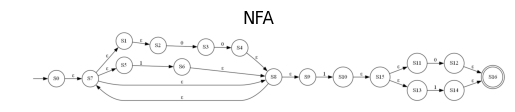

In [2]:
import matplotlib.pyplot as plt
def show_image(image, title='',cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show

req1_img = plt.imread("Req1_NFA.gv.png")
show_image(req1_img, "NFA")

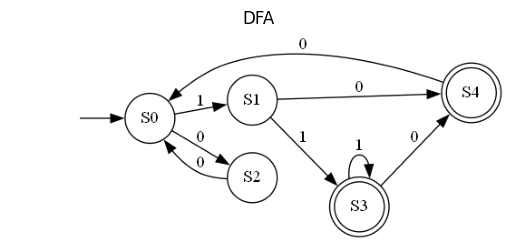

In [3]:
req2_img = plt.imread("Req2_DFA.gv.png")
show_image(req2_img, "DFA")